In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [5]:
!pip install opencv-python

  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
    --------------------------------------- 0.8/39.0 MB 2.4 MB/s eta 0:00:16
   - -------------------------------------- 1.3/39.0 MB 2.5 MB/s eta 0:00:16
   -- ------------------------------------- 2.1/39.0 MB 2.9 MB/s eta 0:00:13
   -- ------------------------------------- 2.9/39.0 MB 3.2 MB/s eta 0:00:12
   ---- ----------------------------------- 4.2/39.0 MB 3.6 MB/s eta 0:00:10
   ----- ---------------------------------- 5.5/39.0 MB 4.0 MB/s eta 0:00:09
   ------- -------------------------------- 7.3/39.0 MB 4.7 MB/s eta 0:00:07
   --------- ------------------------------ 9.7/39.0 MB 5.5 MB/s eta 0:00:06
   ------------ --------------------------- 12.1/39.0 MB 6.1 MB/s eta 0:00:05
   --------------- ------------------------ 15.5/39.0 MB 7.1 MB/s eta 0:00:04
   ---------------

  You can safely remove it manually.
  You can safely remove it manually.


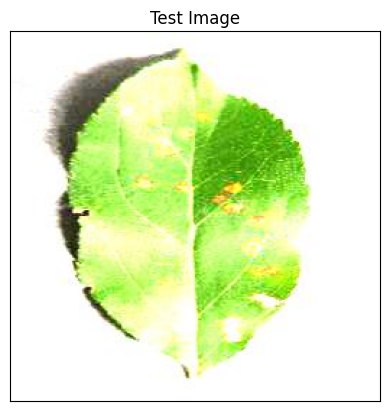

In [6]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 10s 10s/step


In [8]:
print(predictions)

[[9.1572783e-06 1.3139838e-06 9.9975795e-01 2.5381331e-08 1.2317314e-04
  2.8661725e-06 1.5534724e-08 7.4709310e-06 2.6288410e-08 2.9804813e-08
  1.1494242e-08 2.5181988e-08 6.0383996e-09 2.0380384e-09 1.0435539e-06
  3.5034842e-07 1.5935935e-05 2.8313113e-06 2.6907385e-06 1.9084733e-05
  1.0036438e-08 9.9797353e-07 1.5609205e-05 5.2233850e-06 9.7930723e-08
  1.5351308e-08 1.4018121e-06 1.0300131e-06 6.4655155e-06 6.9432923e-07
  1.5314561e-06 8.1121016e-08 8.9557689e-06 5.9963504e-08 3.9000060e-06
  5.3797812e-06 3.9548577e-06 4.7360382e-07]]


In [9]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)


2


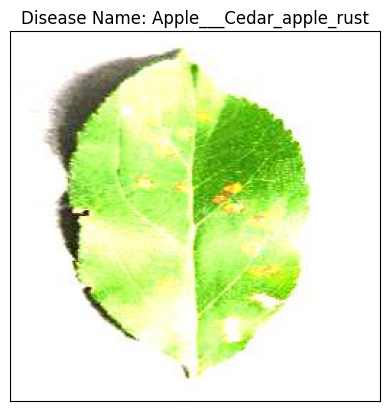

In [10]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()